In [1]:
from plot import colorPanel, loader, stick
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

In [2]:
# Plot according to args
def plotArg(args):
    game = args[1]
    mLoder = loader.loader(args[2], args[3], args[4])
    datas = mLoder.load(args[0])
    colors = colorPanel.colorPanel(args[5]).getColors()

    for i in range(len(datas)):
        label, x, y_mean, y_std = datas[i]

        tmp = label.split('_')
        if len(tmp) == 2:
            label = tmp[-1]
        else:
            label = '%s (%s)' % (tmp[-2], tmp[-1])

        color = colors[i]     
        y_upper = y_mean + y_std
        y_lower = y_mean - y_std
        plt.fill_between(
            x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
        )
        line = plt.plot(x, list(y_mean), label=label, color=color, rasterized=True)          

    stick.cutsomStick(game, mLoder.type_)


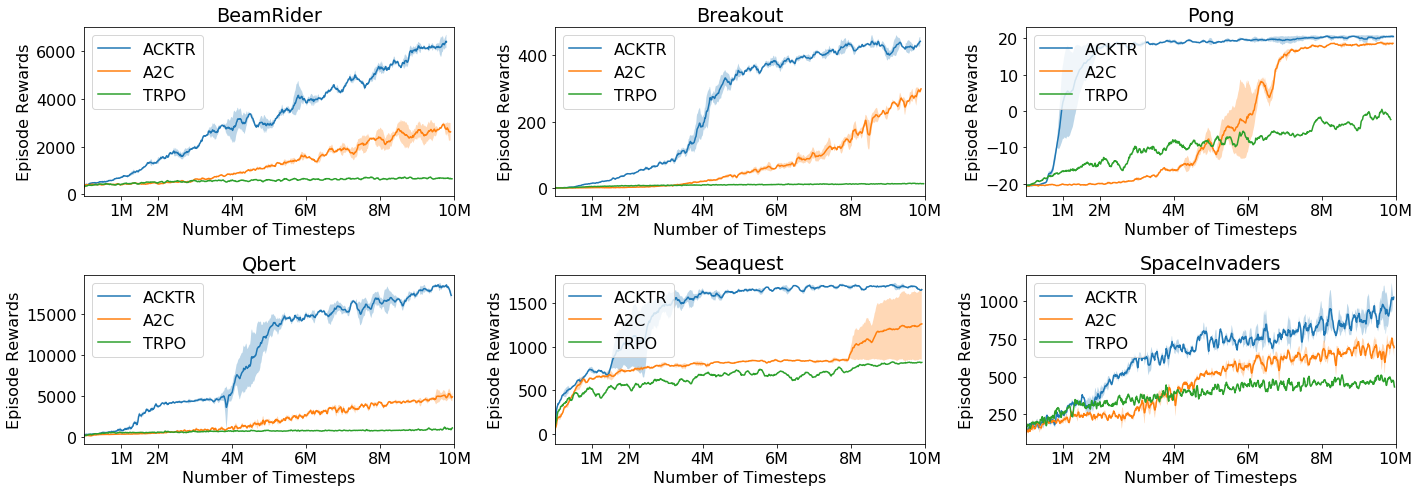

In [3]:
# 0. Input Dir; 1. Game Name; 2. Type of x-axis; 3. Range of number of frames; 4. Index of color panel
plt.figure(figsize=(20,10))
columns = 3
sixAtariGames = [
        ['data/BeamRider', 'BeamRider', 'timesteps', 10000, 40e6, 1],
        ['data/Breakout', 'Breakout', 'timesteps', 10000, 40e6, 1],
        ['data/Pong', 'Pong', 'timesteps', 10000, 40e6, 1],
        ['data/Qbert', 'Qbert', 'timesteps', 10000, 40e6, 1],
        ['data/Seaquest', 'Seaquest', 'timesteps', 10000, 40e6, 1],
        ['data/SpaceInvaders', 'SpaceInvaders', 'timesteps', 10000, 40e6, 1]
]

for i, args in enumerate(sixAtariGames):
    plt.subplot(len(sixAtariGames) / columns + 1, columns, i + 1)
    plotArg(args)

plt.tight_layout()

## Figure 1: Performance comparisons on six standard Atari games trained for 10 million timesteps (1 timestepequals 4 frames). The shaded region denotes the standard deviation over 2 random seeds

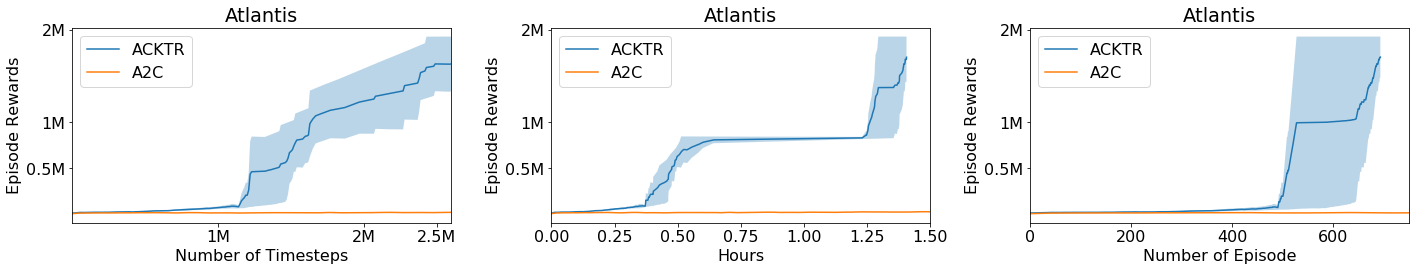

In [4]:
plt.figure(figsize=(20,7))
columns = 3
Atlantis = [
        ['data/Atlantis', 'Atlantis', 'timesteps', 10000, 40e6, 1],
        ['data/Atlantis', 'Atlantis', 'time', 1, 40e6, 1],
        ['data/Atlantis', 'Atlantis', 'eposide', 1, 40e6, 1],      
]

for i, args in enumerate(Atlantis):
    plt.subplot(len(Atlantis) / columns + 1, columns, i + 1)
    plotArg(args)

plt.tight_layout()

## Figure 2: In the Atari game of Atlantis, our agent (ACKTR) quickly learns to obtain rewards of 2 million in 1.3 hours, 600 episodes of games, 2.5 million timesteps. The same result is achieved by advantage actor critic(A2C) in 10 hours, 6000 episodes, 25 million timesteps. ACKTR is 10 times more sample efficient than A2C onthis game

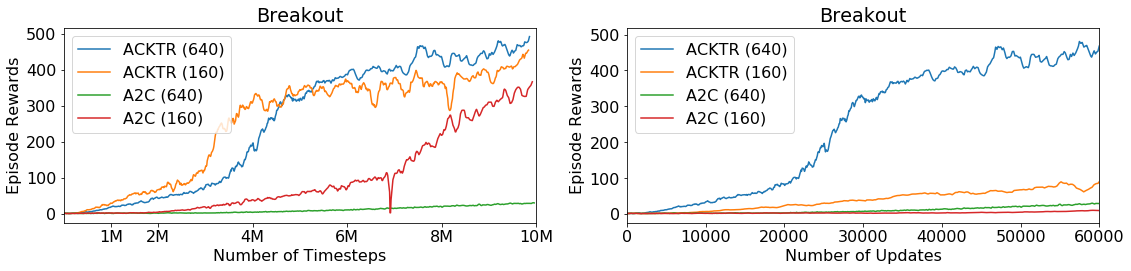

In [5]:

plt.figure(figsize=(16,7))
columns = 2
BatchSize = [
        ['data/Batchsize', 'Breakout', 'timesteps', 10000, 40e6, 1],
        ['data/Batchsize', 'Breakout', 'updates', 10, 40e6, 1],        
]

for i, args in enumerate(BatchSize):
    plt.subplot(len(BatchSize) / columns + 1, columns, i + 1)
    plotArg(args)

plt.tight_layout()

## Figure 5 (d): compare ACKTR and A2C with different batch sizes.

In [6]:
from plot.loader_mujoco import load

color_defaults = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf'  # blue-teal
]

def plot_mujoco(plot_name, all_values, labels):
    lines = []
    names = []

    #plt.figure(figsize=(11.5,8))

    for i in range(len(all_values)):
        x, mean, std = datas[i]
        lower = mean - std
        upper = mean + std

        color = color_defaults[i]

        plt.fill_between(
            x, list(lower), list(upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
        )

        line = plt.plot(x, list(mean), color=color)
        lines.append(line[0])
        names.append(labels[i])

    plt.legend(lines, names, loc=4)
    plt.xlim([0,1000000])
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Episode Reward")
    plt.title(plot_name)
    plt.xticks([200000, 400000, 600000, 800000, 1000000], ["200K", "400K", "600K", "800K", "1M"])

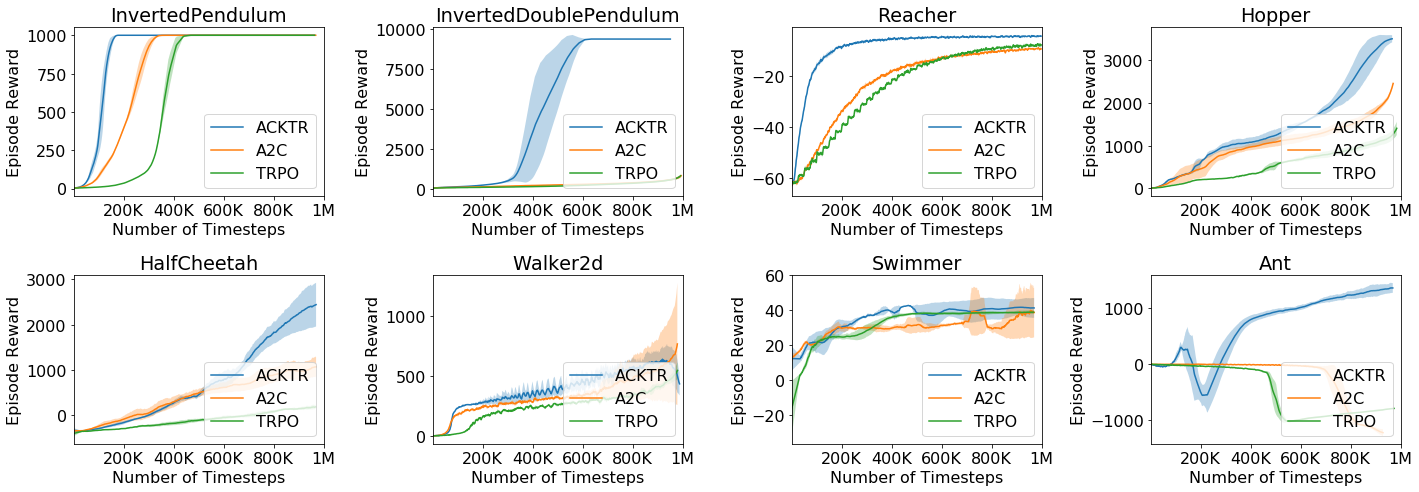

In [7]:
env_ids = ["invertedpendulum", "inverteddoublependulum", "reacher", "hopper",\
            "halfcheetah", "walker2d", "swimmer", "ant"]
plot_names = ["InvertedPendulum", "InvertedDoublePendulum", "Reacher", "Hopper",
            "HalfCheetah", "Walker2d", "Swimmer", "Ant"]

plt.figure(figsize=(20,10))
columns = 4
i = 0
for env_id, plot_name in zip(env_ids, plot_names):
    datas = []
    datas.append(load("data/mujoco/acktr/", "-acktr-seed", env_id))
    datas.append(load("data/mujoco/a2c/", "-a2c-seed", env_id))
    datas.append(load("data/mujoco/trpo/", "-trpo-seed", env_id))
    plt.subplot(len(env_ids) / columns + 1, columns, i + 1)
    i += 1
    labels = ["ACKTR", "A2C", "TRPO"]
    plot_mujoco(plot_name, datas, labels)

plt.tight_layout()


## Figure 3: Performance comparisons on eight MuJoCo environments trained for 1 million timesteps (1 timestep equals 4 frames). The shaded region denotes the standard deviation over 3 random seeds.

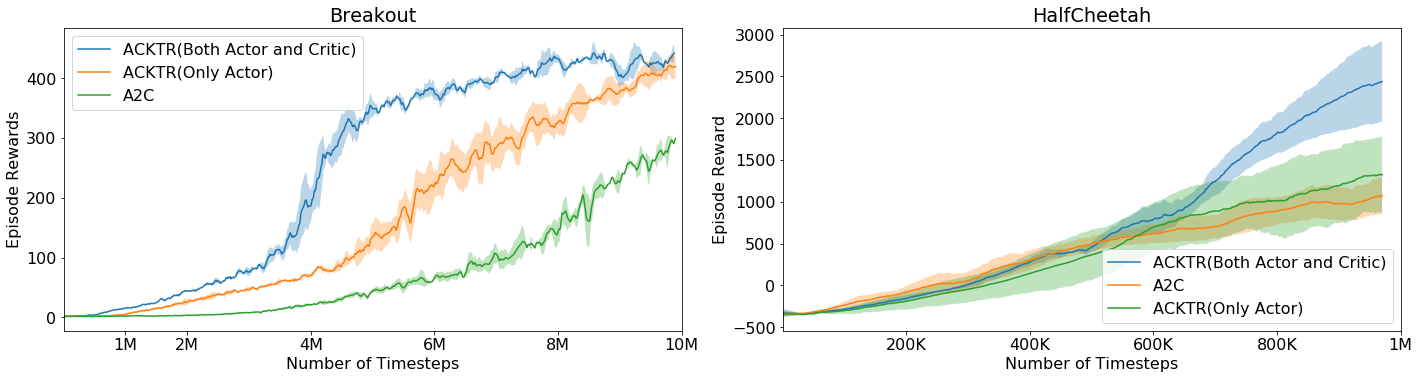

In [9]:
plt.figure(figsize=(20,10))
columns = 2
DNG = [
        ['data/DNG_Breakout', 'Breakout', 'timesteps', 10000, 40e6, 1]        
]

env_id = "halfcheetah"
plot_name = "HalfCheetah"

datas = []
datas.append(load("data/mujoco/acktr/", "-acktr-seed", env_id))
datas.append(load("data/mujoco/a2c/", "-a2c-seed", env_id))
datas.append(load("data/mujoco/acktr/", "-adamvf-acktr-seed", env_id))

labels = ["ACKTR(Both Actor and Critic)", "A2C", "ACKTR(Only Actor)"]

for i, args in enumerate(DNG):
    plt.subplot((len(DNG)+1) / columns + 1, columns, i + 1)
    plotArg(args)

i += 1
plt.subplot((len(DNG)+1) / columns + 1, columns, i + 1)
plot_mujoco(plot_name, datas, labels)


plt.tight_layout()


## Figure 5 (a, b): compare optimizing the critic (value network) with a Gauss-Newton norm (ACKTR)against a Euclidean norm (first order).